In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la
from itertools import combinations

# Solved exercised 

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
#Set seed
np.random.seed(765)

N = 1000  #Fixing number of entries

x_1 = np.random.normal(loc = 0, scale = 1, size = N)
x_2 = x_1 + np.random.normal(loc = 0, scale = 3, size = N)
x_3 = (2 * x_1) + x_2

data = pd.DataFrame({'x1' : x_1, 'x2' : x_2, 'x3' : x_3})  #Getting a DataFrame

#Eigenvalues and eigenvectors of covariance matrix
covariance_matrix = np.cov(data.T)
print('Covariance matrix:\n', covariance_matrix)
l, V = la.eig(covariance_matrix)
print('\nEigenvalues:\n', l.real)
print('\nEigenvectors:\n', V)

#SVD method
U, spectrum, Vt = la.svd(data.T)
l_svd = (spectrum ** 2)/(N-1)
V_svd = U

print('\nEigenvalues SVD :\n', l_svd)
print('\nEigenvectors SVD:\n', V_svd)

#Checking if both methods lead to the same result
if np.allclose(np.sort(l), np.sort(l_svd), atol = 0.05) == True and np.allclose(np.sort(V), np.sort(V_svd), atol = 0.05) == True:
    print("\nSVD yields to the same result")
else:
    print("\nSVD doesn't yield to the same result")
    
#Getting percent variabilities
percent_variabilities = l.real * 100 / np.sum(l.real)
print("\nPercent of dataset's variability:")

for v in percent_variabilities[np.argsort(-percent_variabilities)]:
    if v > 1e-3:
        print(f'{v:.3f}%')
    else:
        print(f'{v:.3e}%')

Covariance matrix:
 [[ 0.95068316  1.0093826   2.91074892]
 [ 1.0093826   9.29793572 11.31670091]
 [ 2.91074892 11.31670091 17.13819876]]

Eigenvalues:
 [2.55503148e+01 1.79580945e-16 1.83650286e+00]

Eigenvectors:
 [[-0.11947819 -0.81649658  0.56485246]
 [-0.57232196 -0.40824829 -0.71118275]
 [-0.81127833  0.40824829  0.41852216]]

Eigenvalues SVD :
 [2.55514650e+01 1.83658377e+00 7.55484295e-30]

Eigenvectors SVD:
 [[-0.11947092  0.56485399 -0.81649658]
 [-0.57233111 -0.71117539 -0.40824829]
 [-0.81127295  0.4185326   0.40824829]]

SVD yields to the same result

Percent of dataset's variability:
93.294%
6.706%
6.557e-16%


We see one very high percent and the other two that are really small, one in particular is practically zero. This is due to the fact that there is only one indipendent variable, which is $x_1$, and the other two are just derived from $x_1$:

* $x_2$ is just $x_1$ plus another gaussian distribution with same mean and different standard deviation, so we expect low variability with respect to this variable
* $x_3$ is just a combination of $x_1$ and $x_2$ so its variability should be very very low, which is what we observe ($\cal o\left(10^{-15}\right)$)

**Notice**: I supposed $x_3$ was the dimension responsable for the lowest variability in the Principal Components Analysis, but the index referring to the lowest eigenvalue is the second one, so it refers to the second dimension, which is $x_2$. There are two possible explanations for this:

* the order of the eigenvalues does not follow the same order of the dataframe columns (i. e. the order of the dimensions)
* everything I just explained is actually incorrect

Assuming that what I have done up to now is correct (also because, otherwise, I would correct it) i will descard the DataFrame column explicitly referring to the '$x_3$' one and not the second one:

In [3]:
data_reduced = data.drop(['x3'], axis = 1)
data_reduced

,x1,x2
0,-2.614907,-4.710279
1,-1.716589,-5.340270
2,0.248970,-0.769635
3,-0.117671,-2.498149
4,0.864152,-0.393662
...,...,...
995,0.388245,3.029568
996,-0.632233,0.962775
997,-0.326495,1.194963
998,-0.380675,-2.729426


In [4]:
dimensions = ['x1', 'x2', 'x3']

#Ridefining data in the eigenvectors' base by multipling each vector by the eigenvectors matrix
data_newbase = pd.DataFrame(np.dot(V, data.T).T, columns=['x1', 'x2', 'x3'])
data_newbase

,x1,x2,x3
0,-1.456335,10.488753,-3.961695
1,-0.390297,9.402124,-4.459407
2,0.445190,0.364937,-0.629896
3,0.509770,3.031223,-2.068427
4,0.972052,-1.283036,-0.303202
...,...,...,...
995,-0.370158,-4.165819,2.514761
996,-0.880975,0.183346,0.779704
997,-0.630539,-0.686423,0.979548
998,0.302276,3.814732,-2.266417


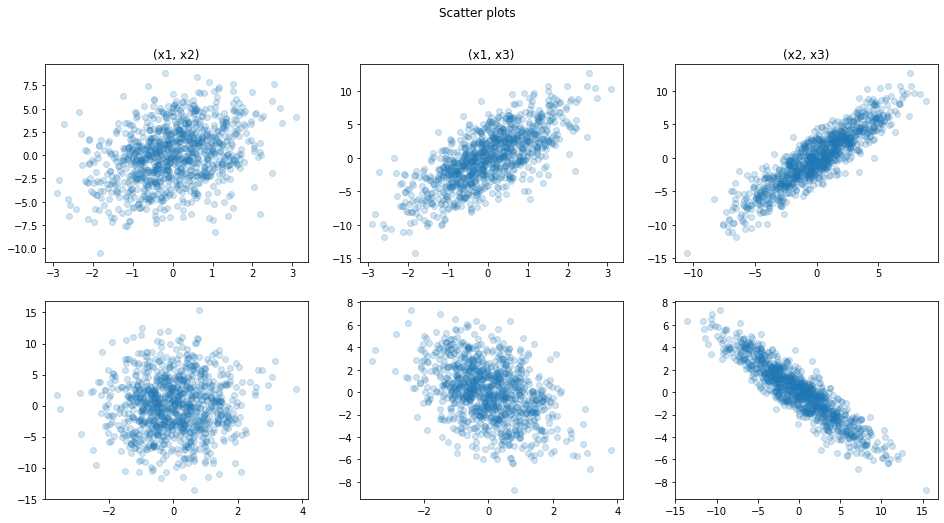

In [5]:

#Evaluating all pair combinations of 'x1', 'x2' and 'x3'
combinations = list(combinations(dimensions, 2))

#Plots
fig, ax = plt.subplots(2, 3, figsize=(16,8))

for i, (dim1, dim2) in zip(range(0,3), combinations):
    ax[0,i].set_title(f'({dim1}, {dim2})')
    ax[0,i].scatter(data[dim1], data[dim2], alpha = 0.2)
    ax[1,i].scatter(data_newbase[dim1], data_newbase[dim2], alpha = 0.2)
    
fig.suptitle('Scatter plots')
plt.show()

# Proposed solution

In [6]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import matplotlib.pyplot as plt
from itertools import combinations

In [7]:
#Set seed
np.random.seed(765)

N = 1000

x1 = np.random.normal(0,1,N)
x2 = np.random.normal(0,3,N) + x1
x3 = 2*x1+x2

data = np.array([x1,x2,x3])
print("Shape", data.shape)

Shape (3, 1000)


In [8]:
#Covariance matrix 
covariance_matrix = np.cov(data)
print('Covariance matrix:\n', covariance_matrix)

Covariance matrix:
 [[ 0.95068316  1.0093826   2.91074892]
 [ 1.0093826   9.29793572 11.31670091]
 [ 2.91074892 11.31670091 17.13819876]]


In [9]:
#Eigenvalues and eigenvectors
l, V = la.eig(covariance_matrix)
print(l)
print(V)

[2.55503148e+01+0.j 1.79580945e-16+0.j 1.83650286e+00+0.j]
[[-0.11947819 -0.81649658  0.56485246]
 [-0.57232196 -0.40824829 -0.71118275]
 [-0.81127833  0.40824829  0.41852216]]


In [10]:
#Sort the index in descending order
i = l.argsort()[::-1]
print(i)
l = l[i]
V = V[:,i]

print("l\n", l)
print("V\n", V)

[0 2 1]
l
 [2.55503148e+01+0.j 1.83650286e+00+0.j 1.79580945e-16+0.j]
V
 [[-0.11947819  0.56485246 -0.81649658]
 [-0.57232196 -0.71118275 -0.40824829]
 [-0.81127833  0.41852216  0.40824829]]


In [11]:
#SVD method
#Note svd method return S as a vector(s) with the singular values, within each vector sorted in descending order
U, spectrum, Vt = la.svd(data)
l_svd = (spectrum ** 2)/(N-1)
V_svd = U

print("l_svd\n", l_svd)
print("V_svd\n", V_svd)

l_svd
 [2.55514650e+01 1.83658377e+00 7.55484295e-30]
V_svd
 [[-0.11947092  0.56485399 -0.81649658]
 [-0.57233111 -0.71117539 -0.40824829]
 [-0.81127295  0.4185326   0.40824829]]


In [12]:
#Checking if both methods lead to the same result
if np.allclose(np.sort(l), np.sort(l_svd), atol = 0.05) == True and np.allclose(np.sort(V), np.sort(V_svd), atol = 0.05) == True:
    print("\nSVD yields to the same result")
else:
    print("\nSVD doesn't yield to the same result")


SVD yields to the same result


In [13]:
#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense? 


#Getting percent variabilities
percent_variabilities = l.real * 100 / np.sum(l.real)
print("\nPercent of dataset's variability:")

for v in percent_variabilities[np.argsort(-percent_variabilities)]:
    if v > 1e-3:
        print(f'{v:.3f}%')
    else:
        print(f'{v:.3e}%')


Percent of dataset's variability:
93.294%
6.706%
6.557e-16%


(This is correct) 


We see one very high percent and the other two that are really small, one in particular is practically zero. This is due to the fact that there is only one indipendent variable, which is $x_1$, and the other two are just derived from $x_1$:

* $x_2$ is just $x_1$ plus another gaussian distribution with same mean and different standard deviation, so we expect low variability with respect to this variable
* $x_3$ is just a combination of $x_1$ and $x_2$ so its variability should be very very low, which is what we observe ($\cal o\left(10^{-15}\right)$)

In [14]:
#Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
pc = np.real(np.sum(l[:2])/np.sum(l))*100
print(f"Variability of the dataset using PCA {pc}%")




Variability of the dataset using PCA 99.99999999999999%


In [15]:
# Redefine the data in the basis yielded by the PCA procedure


"""
As reducing the system dimensionality one retains at least 99% 
of the total variability, one can define the new basis as follows:

        np.dot(V[:,:2].T, data)

"""

data_pc = np.dot(V[:,:2].T, data)
data_pc = np.vstack([data_pc, np.zeros((1, N))]) #3rd component to zero
print("Data in the basis yielded by PCA \n", data_pc)


#If one consider all the initial eigenvectors
#data_newbase = np.dot(V.T, data)
#print("Data in the new base \n", data_newbase)


Data in the basis yielded by PCA 
 [[11.07240126 10.37915817  0.63115336 ... -1.08458564  4.43958373
  -3.92623929]
 [-2.2873162  -0.84359442  0.57427137 ... -0.80743089  0.26512863
  -0.23646683]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


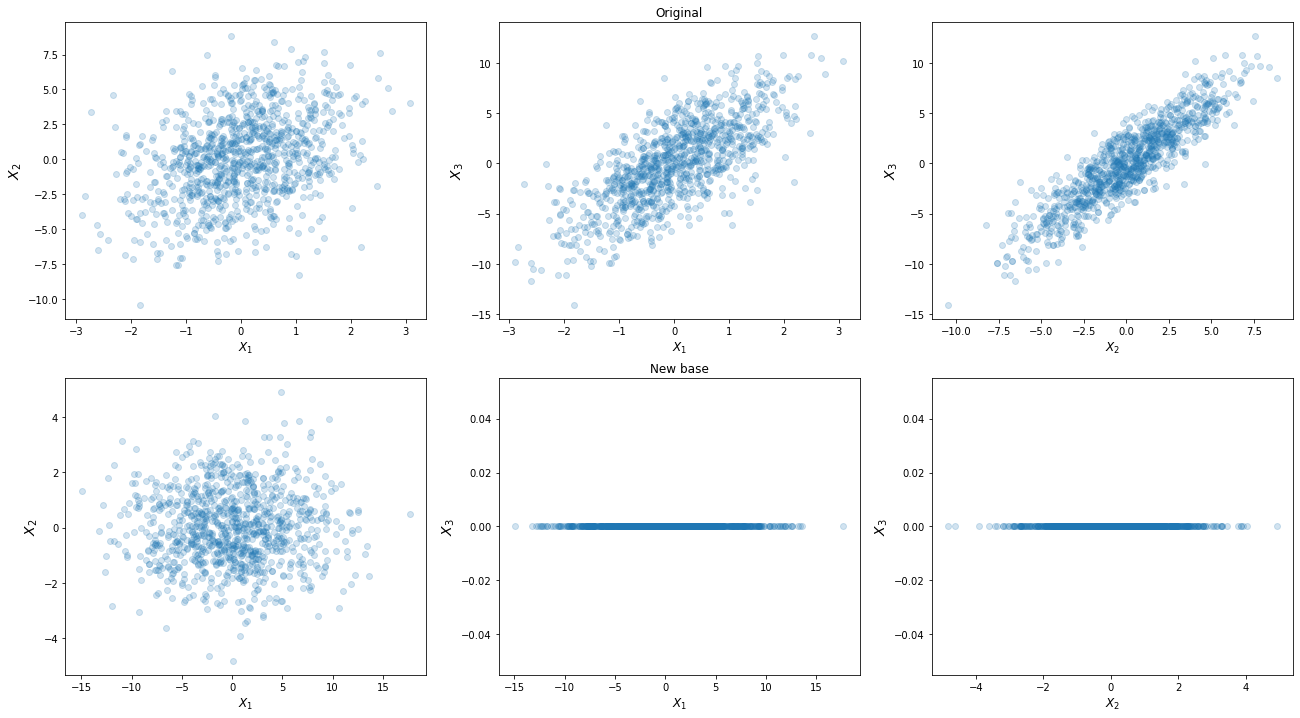

In [16]:
# Plot the data points in the original and the new coordiantes as a set of scatter plots. 
n_rows = 2
n_cols = 3
fig, axes = plt.subplots(2, 3, figsize = (22, 12))
axes[0,1].set_title("Original")
axes[1,1].set_title("New base")
idx_data = np.array([[0,1],[0,2],[1,2]])
X = [data, data_pc]
#X = [data, data_newbase]

for i in range(n_rows):
    x = X[i]
    for j in range(n_cols):
        idx0 = idx_data[j,0]
        idx1 = idx_data[j,1]
        axes[i,j].scatter(x[idx0,:], x[idx1,:], alpha = 0.2)
        axes[i,j].set_xlabel("$X_"+str(idx0+1)+"$", size=12)
        axes[i,j].set_ylabel("$X_"+str(idx1+1)+"$", size=14)
